In [1]:
# pip install keras-self-attention
import os, time, gc, sys, io, pdb
import datetime, keras, pickle
import warnings, random, statistics
#
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import mpl_toolkits.axisartist as AA
from mpl_toolkits.axes_grid1 import host_subplot
import statistics as sts
#
from scipy import stats
from pandas import Series
from matplotlib.ticker import MultipleLocator, ScalarFormatter
#
# tf.logging.set_verbosity(tf.logging.ERROR)
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

2024-04-29 12:21:24.787961: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-04-29 12:21:24.854679: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-29 12:21:25.748025: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [19]:
def load_output_preprocessed_data(path, win, tr_tst, k, mld, multi):
        '''
        Returns the preprocessed data as a list of objects
        
        Arguments:
        path - path to the preprocessed data
        win - window size
        multi - boolean value to indicate if the data is multivariate or not
        '''

        if multi == False:
            fdat = f'/home/vvallejo/Finance-AI/DataProcessed/output/{win}/{tr_tst}/prueba-{mld}-output.pkl'

        else:
            fdat = f'/home/vvallejo/Finance-AI/DataProcessed/output/{win}/{tr_tst}/prueba-{mld}-m-output.pkl'

        with (open(fdat, "rb")) as openfile:
            while True:
                try:
                    path      = pickle.load(openfile)
                    fdat     = pickle.load(openfile)
                    lahead    = pickle.load(openfile)
                    lpar      =pickle.load(openfile)
                    tot_res   = pickle.load(openfile)
                except EOFError:
                    break
        return path, fdat, lahead, lpar, tot_res

In [6]:
tr_tst = 0.7
processed_path = f"/home/vvallejo/Finance-AI/DataProcessed/{tr_tst}"
win_size = 5
k = 2
multi = False
mdl  = 'transformer'
_, _, lahead, lpar, tot_res = load_output_preprocessed_data(processed_path, win_size, tr_tst, k, mdl, multi)
win, n_ftrs, tr_tst, deep = lpar

In [7]:
tot_res['OUT_MODEL']['scenario_1']['AAPL'].keys()

dict_keys([1])

In [8]:
tot_res['OUT_MODEL']['scenario_1']['AAPL'][1].keys()

Index(['MSEP', 'MSEY', 'Stock', 'DY', 'ALG', 'seed', 'epochs', 'nhn', 'win',
       'ndims', 'lossh', 'nit', 'model', 'ttrain', 'bsize', 'tr_tst',
       'transformer_parameters'],
      dtype='object')

In [25]:
tot_res['INPUT_DATA'][1].keys()

dict_keys(['x', 'y', 'nx', 'ny', 'numt', 'trainX', 'trainY', 'testX', 'testY', 'vdd'])

In [22]:
print("Annualized volatility:",round(tot_res['INPUT_DATA']['scenario_1']['AAPL'][1]['x'][0][0][9]*np.sqrt(252)*100,2),"%")

KeyError: 'scenario_1'

In [64]:
res1 = tot_res['Transformer_OUT_MODEL']
stck = 'AAPL'
ahead= 1
itr  = 0
DYs  = res1[ahead]['DY']
DY   = DYs.loc[itr]

In [65]:
DY

,Y_real,Y_predicted,Y_yesterday
date,,,
2022-03-14,151.45,143.592773,158.93
2022-03-15,150.90,142.489487,151.45
2022-03-16,157.05,142.080002,150.90
2022-03-17,158.61,142.197098,157.05
2022-03-18,160.51,142.952805,158.61
...,...,...,...
2023-12-20,196.90,197.059097,196.16
2023-12-21,196.10,196.682022,196.90
2023-12-22,195.18,196.238373,196.10


In [66]:
res1[1]['DY'][0].shape

(451, 3)

In [67]:
print(res1[1]['MSEY'])
print(res1[1]['MSEP'])

0    7.83102
1    7.83102
2    7.83102
3    7.83102
4    7.83102
5    7.83102
6    7.83102
7    7.83102
8    7.83102
9    7.83102
Name: MSEY, dtype: float64
0    14.629650
1    14.013194
2    13.042264
3    12.129079
4    12.815823
5    11.790583
6    11.650809
7    11.555698
8     9.677805
9    10.813677
Name: MSEP, dtype: float64


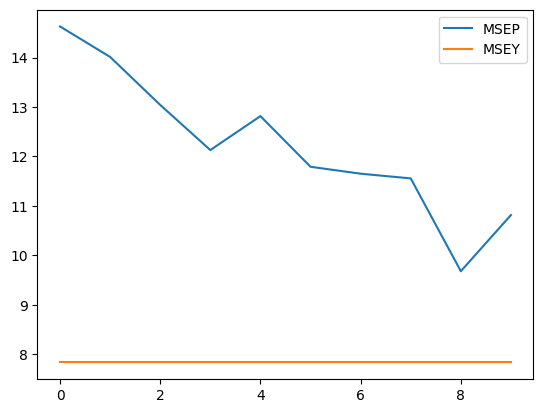

In [68]:
plt.plot(res1[1]['MSEP'], label='MSEP')
plt.plot(res1[1]['MSEY'], label='MSEY')
plt.legend()
plt.show()

12.498
48.297


"path = f'D:\\Escritorio\\TFG\\Finance-AI\\Figures/{tr_tst}/'\nif not os.path.exists(path):\n    os.makedirs(path)\n\nplt.tight_layout()\n#plt.show()\nfigfich = path + f'{mdl}-{stck}-{itr}-{num_heads}-{num_layers}.png'.format(mdl, stck, itr)\nplt.savefig(figfich)\n"

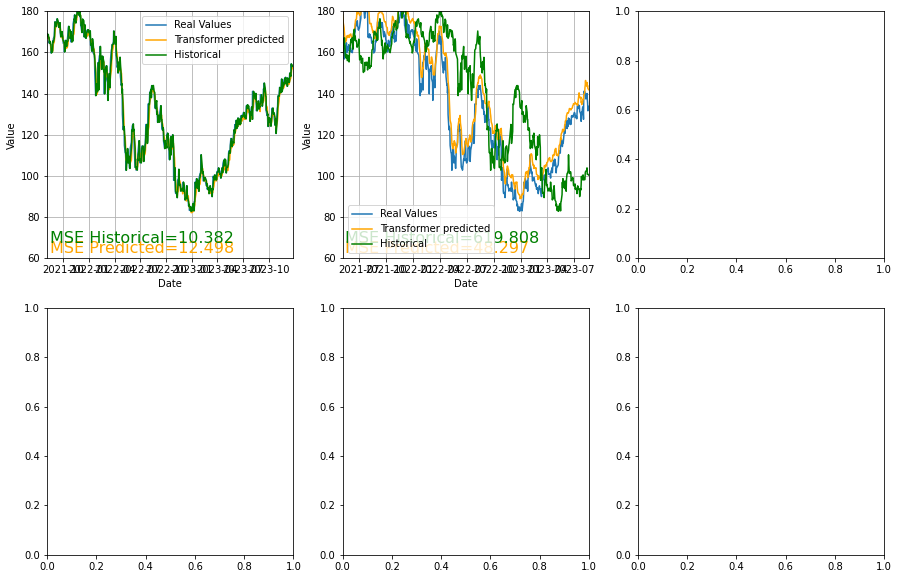

In [3]:
tr_tst = 0.7
processed_path = f"/home/vvallejo/Finance-AI/DataProcessed/{tr_tst}"
win_size = 5
k = 2
multi = False
mdl  = 'transformer'
_, _, lahead, lpar, tot_res = load_output_preprocessed_data(processed_path, win_size, tr_tst, k, mdl, multi)
win, n_ftrs, tr_tst = lpar
def plot_res(ax, DY, msep, msey, stck, mdl, itr):
    ax.plot(DY.index, DY.Y_real, label="Real Values")
    p2 = ax.plot(DY.index, DY.Y_predicted, label="Transformer predicted", color='orange')
    p3 = ax.plot(DY.index, DY.Y_yesterday, label="Historical", color='green')
    
    #ax.set_title(f'{stck} - {mdl.upper()}, Predict {ahead} days ahead. Iter: {itr},\n Heads: {num_heads}, Hidden Layers: {num_layers}')
    ax.set_xlabel('Date')
    ax.set_ylabel('Value')
    ax.legend()
    ax.grid(True)
    
    # Agregar texto
    ax.text(.01, .01, 'MSE Predicted=' + str(round(msep,3)), transform=ax.transAxes, ha='left', va='bottom', fontsize=16, color='#FFA500')
    ax.text(.01, .05, 'MSE Historical=' + str(round(msey,3)), transform=ax.transAxes, fontsize=16, ha='left', va='bottom', color='green')
    print(str(round(msep,3)))
# Código para generar subgráficos para cada valor en la lista lahead
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

for i, ahead in enumerate([1, 90]):
    res1 = tot_res['OUT_MODEL']['scenario_1']['AMZN']
    mdl = 'transformer'
    stck = 'AAPL'
    itr = 0
    DYs = res1[ahead]['DY']
    DY = DYs.loc[itr]
    msep = res1[ahead]['MSEP'][itr]
    msey = res1[ahead]['MSEY'][itr]
    row = i // 3
    col = i % 3
    plot_res(axs[row, col], DY, msep, msey, stck, mdl, itr)
    
    # Ajustar los límites del eje X y Y
    axs[row, col].set_xlim(DY.index.min(), DY.index.max())  # Ajustar los límites del eje X
    axs[row, col].set_ylim(60, 180)

'''path = f'D:\Escritorio\TFG\Finance-AI\Figures/{tr_tst}/'
if not os.path.exists(path):
    os.makedirs(path)

plt.tight_layout()
#plt.show()
figfich = path + f'{mdl}-{stck}-{itr}-{num_heads}-{num_layers}.png'.format(mdl, stck, itr)
plt.savefig(figfich)
'''

11.868
45.657


"path = f'D:\\Escritorio\\TFG\\Finance-AI\\Figures/{tr_tst}/'\nif not os.path.exists(path):\n    os.makedirs(path)\n\nplt.tight_layout()\n#plt.show()\nfigfich = path + f'{mdl}-{stck}-{itr}-{num_heads}-{num_layers}.png'.format(mdl, stck, itr)\nplt.savefig(figfich)\n"

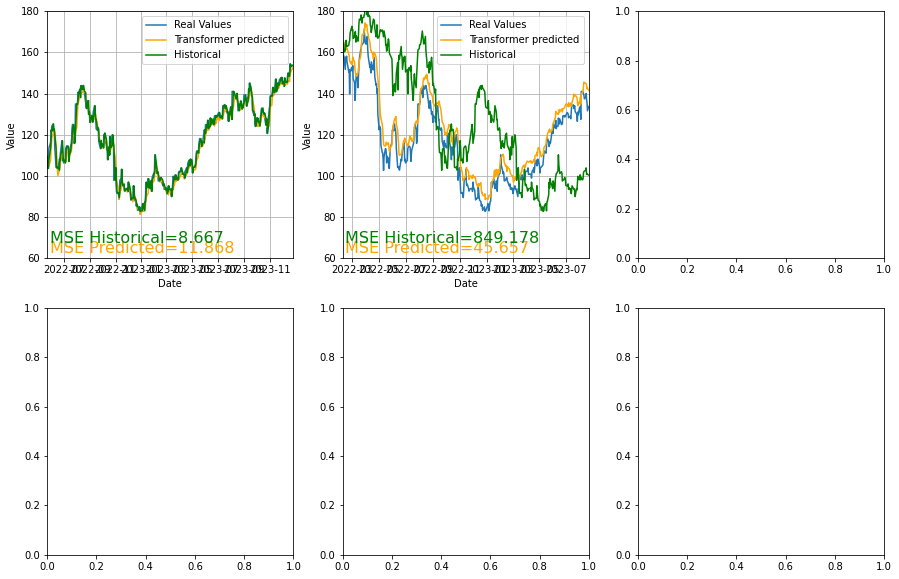

In [4]:
tr_tst = 0.8
processed_path = f"/home/vvallejo/Finance-AI/DataProcessed/{tr_tst}"
win_size = 5
k = 2
multi = False
mdl  = 'transformer'
_, _, lahead, lpar, tot_res = load_output_preprocessed_data(processed_path, win_size, tr_tst, k, mdl, multi)
win, n_ftrs, tr_tst = lpar
def plot_res(ax, DY, msep, msey, stck, mdl, itr):
    ax.plot(DY.index, DY.Y_real, label="Real Values")
    p2 = ax.plot(DY.index, DY.Y_predicted, label="Transformer predicted", color='orange')
    p3 = ax.plot(DY.index, DY.Y_yesterday, label="Historical", color='green')
    
    #ax.set_title(f'{stck} - {mdl.upper()}, Predict {ahead} days ahead. Iter: {itr},\n Heads: {num_heads}, Hidden Layers: {num_layers}')
    ax.set_xlabel('Date')
    ax.set_ylabel('Value')
    ax.legend()
    ax.grid(True)
    
    # Agregar texto
    ax.text(.01, .01, 'MSE Predicted=' + str(round(msep,3)), transform=ax.transAxes, ha='left', va='bottom', fontsize=16, color='#FFA500')
    ax.text(.01, .05, 'MSE Historical=' + str(round(msey,3)), transform=ax.transAxes, fontsize=16, ha='left', va='bottom', color='green')
    print(str(round(msep,3)))
# Código para generar subgráficos para cada valor en la lista lahead
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

for i, ahead in enumerate([1, 90]):
    res1 = tot_res['OUT_MODEL']['scenario_1']['AMZN']
    mdl = 'transformer'
    stck = 'AAPL'
    itr = 0
    DYs = res1[ahead]['DY']
    DY = DYs.loc[itr]
    msep = res1[ahead]['MSEP'][itr]
    msey = res1[ahead]['MSEY'][itr]
    row = i // 3
    col = i % 3
    plot_res(axs[row, col], DY, msep, msey, stck, mdl, itr)
    
    # Ajustar los límites del eje X y Y
    axs[row, col].set_xlim(DY.index.min(), DY.index.max())  # Ajustar los límites del eje X
    axs[row, col].set_ylim(60, 180)

'''path = f'D:\Escritorio\TFG\Finance-AI\Figures/{tr_tst}/'
if not os.path.exists(path):
    os.makedirs(path)

plt.tight_layout()
#plt.show()
figfich = path + f'{mdl}-{stck}-{itr}-{num_heads}-{num_layers}.png'.format(mdl, stck, itr)
plt.savefig(figfich)
'''

175.952
297.888


"path = f'D:\\Escritorio\\TFG\\Finance-AI\\Figures/{tr_tst}/'\nif not os.path.exists(path):\n    os.makedirs(path)\n\nplt.tight_layout()\n#plt.show()\nfigfich = path + f'{mdl}-{stck}-{itr}-{num_heads}-{num_layers}.png'.format(mdl, stck, itr)\nplt.savefig(figfich)\n"

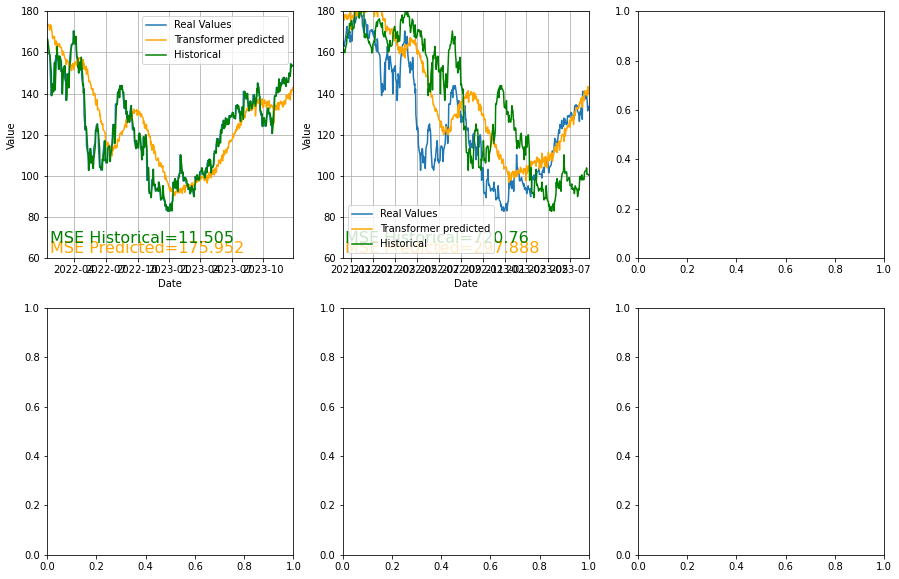

In [5]:
tr_tst = 0.75
processed_path = f"/home/vvallejo/Finance-AI/DataProcessed/{tr_tst}"
win_size = 50
k = 2
multi = False
mdl  = 'transformer'
_, _, lahead, lpar, tot_res = load_output_preprocessed_data(processed_path, win_size, tr_tst, k, mdl, multi)
win, n_ftrs, tr_tst = lpar
def plot_res(ax, DY, msep, msey, stck, mdl, itr):
    ax.plot(DY.index, DY.Y_real, label="Real Values")
    p2 = ax.plot(DY.index, DY.Y_predicted, label="Transformer predicted", color='orange')
    p3 = ax.plot(DY.index, DY.Y_yesterday, label="Historical", color='green')
    
    #ax.set_title(f'{stck} - {mdl.upper()}, Predict {ahead} days ahead. Iter: {itr},\n Heads: {num_heads}, Hidden Layers: {num_layers}')
    ax.set_xlabel('Date')
    ax.set_ylabel('Value')
    ax.legend()
    ax.grid(True)
    
    # Agregar texto
    ax.text(.01, .01, 'MSE Predicted=' + str(round(msep,3)), transform=ax.transAxes, ha='left', va='bottom', fontsize=16, color='#FFA500')
    ax.text(.01, .05, 'MSE Historical=' + str(round(msey,3)), transform=ax.transAxes, fontsize=16, ha='left', va='bottom', color='green')
    print(str(round(msep,3)))
# Código para generar subgráficos para cada valor en la lista lahead
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

for i, ahead in enumerate([1, 90]):
    res1 = tot_res['OUT_MODEL']['scenario_2']['AMZN']
    mdl = 'transformer'
    stck = 'AAPL'
    itr = 0
    DYs = res1[ahead]['DY']
    DY = DYs.loc[itr]
    msep = res1[ahead]['MSEP'][itr]
    msey = res1[ahead]['MSEY'][itr]
    row = i // 3
    col = i % 3
    plot_res(axs[row, col], DY, msep, msey, stck, mdl, itr)
    
    # Ajustar los límites del eje X y Y
    axs[row, col].set_xlim(DY.index.min(), DY.index.max())  # Ajustar los límites del eje X
    axs[row, col].set_ylim(60, 180)

'''path = f'D:\Escritorio\TFG\Finance-AI\Figures/{tr_tst}/'
if not os.path.exists(path):
    os.makedirs(path)

plt.tight_layout()
#plt.show()
figfich = path + f'{mdl}-{stck}-{itr}-{num_heads}-{num_layers}.png'.format(mdl, stck, itr)
plt.savefig(figfich)
'''

105.118
216.898


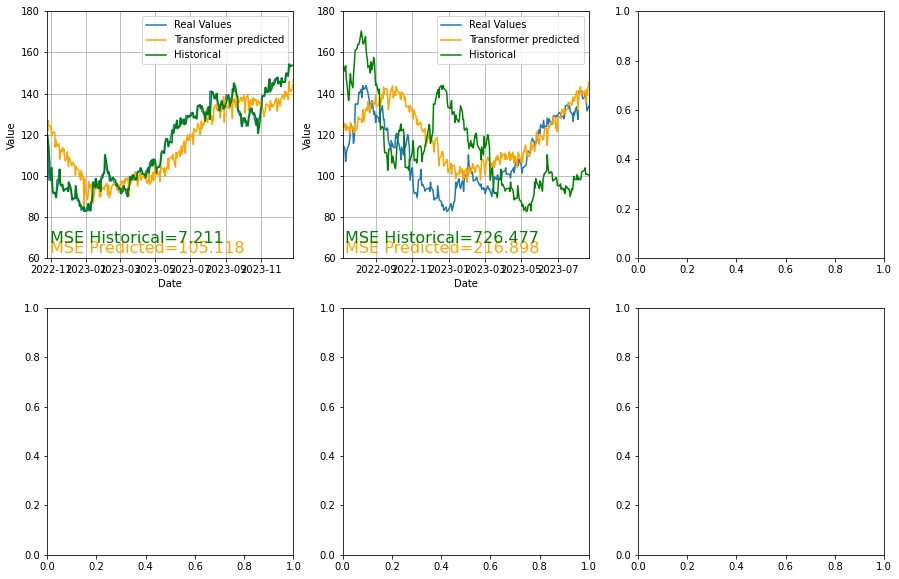

In [6]:
tr_tst = 0.85
processed_path = f"/home/vvallejo/Finance-AI/DataProcessed/{tr_tst}"
win_size = 50
k = 2
multi = False
mdl  = 'transformer'
_, _, lahead, lpar, tot_res = load_output_preprocessed_data(processed_path, win_size, tr_tst, k, mdl, multi)
win, n_ftrs, tr_tst = lpar
def plot_res(ax, DY, msep, msey, stck, mdl, itr):
    ax.plot(DY.index, DY.Y_real, label="Real Values")
    p2 = ax.plot(DY.index, DY.Y_predicted, label="Transformer predicted", color='orange')
    p3 = ax.plot(DY.index, DY.Y_yesterday, label="Historical", color='green')
    
    #ax.set_title(f'{stck} - {mdl.upper()}, Predict {ahead} days ahead. Iter: {itr},\n Heads: {num_heads}, Hidden Layers: {num_layers}')
    ax.set_xlabel('Date')
    ax.set_ylabel('Value')
    ax.legend()
    ax.grid(True)
    
    # Agregar texto
    ax.text(.01, .01, 'MSE Predicted=' + str(round(msep,3)), transform=ax.transAxes, ha='left', va='bottom', fontsize=16, color='#FFA500')
    ax.text(.01, .05, 'MSE Historical=' + str(round(msey,3)), transform=ax.transAxes, fontsize=16, ha='left', va='bottom', color='green')
    print(str(round(msep,3)))
# Código para generar subgráficos para cada valor en la lista lahead
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

for i, ahead in enumerate([1, 90]):
    res1 = tot_res['OUT_MODEL']['scenario_2']['AMZN']
    mdl = 'transformer'
    stck = 'AAPL'
    itr = 0
    DYs = res1[ahead]['DY']
    DY = DYs.loc[itr]
    msep = res1[ahead]['MSEP'][itr]
    msey = res1[ahead]['MSEY'][itr]
    row = i // 3
    col = i % 3
    plot_res(axs[row, col], DY, msep, msey, stck, mdl, itr)
    
    # Ajustar los límites del eje X y Y
    axs[row, col].set_xlim(DY.index.min(), DY.index.max())  # Ajustar los límites del eje X
    axs[row, col].set_ylim(60, 180)

3.501
28.924


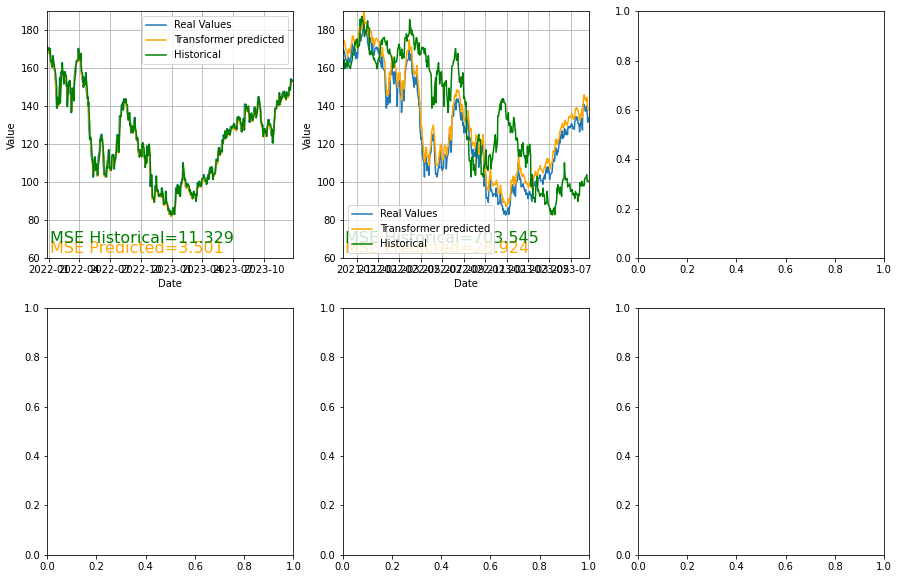

In [9]:
tr_tst = 0.75
processed_path = f"/home/vvallejo/Finance-AI/DataProcessed/{tr_tst}"
win_size = 2
k = 2
multi = False
mdl  = 'transformer'
_, _, lahead, lpar, tot_res = load_output_preprocessed_data(processed_path, win_size, tr_tst, k, mdl, multi)
win, n_ftrs, tr_tst = lpar
def plot_res(ax, DY, msep, msey, stck, mdl, itr):
    ax.plot(DY.index, DY.Y_real, label="Real Values")
    p2 = ax.plot(DY.index, DY.Y_predicted, label="Transformer predicted", color='orange')
    p3 = ax.plot(DY.index, DY.Y_yesterday, label="Historical", color='green')
    
    #ax.set_title(f'{stck} - {mdl.upper()}, Predict {ahead} days ahead. Iter: {itr},\n Heads: {num_heads}, Hidden Layers: {num_layers}')
    ax.set_xlabel('Date')
    ax.set_ylabel('Value')
    ax.legend()
    ax.grid(True)
    
    # Agregar texto
    ax.text(.01, .01, 'MSE Predicted=' + str(round(msep,3)), transform=ax.transAxes, ha='left', va='bottom', fontsize=16, color='#FFA500')
    ax.text(.01, .05, 'MSE Historical=' + str(round(msey,3)), transform=ax.transAxes, fontsize=16, ha='left', va='bottom', color='green')
    print(str(round(msep,3)))
# Código para generar subgráficos para cada valor en la lista lahead
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

for i, ahead in enumerate([1, 90]):
    res1 = tot_res['OUT_MODEL']['scenario_3']['AMZN']
    mdl = 'transformer'
    stck = 'AAPL'
    itr = 0
    DYs = res1[ahead]['DY']
    DY = DYs.loc[itr]
    msep = res1[ahead]['MSEP'][itr]
    msey = res1[ahead]['MSEY'][itr]
    row = i // 3
    col = i % 3
    plot_res(axs[row, col], DY, msep, msey, stck, mdl, itr)
    
    # Ajustar los límites del eje X y Y
    axs[row, col].set_xlim(DY.index.min(), DY.index.max())  # Ajustar los límites del eje X
    axs[row, col].set_ylim(60, 190)

2.859
32.398


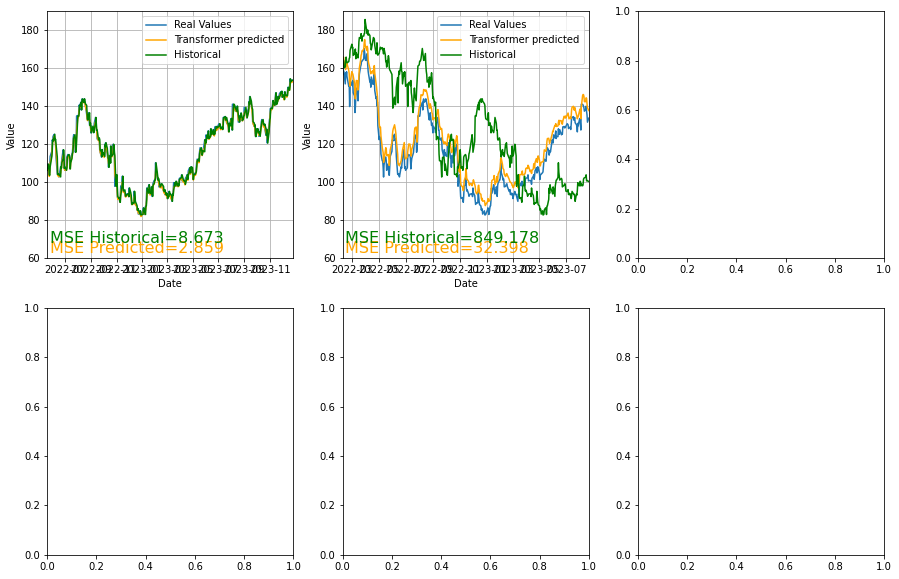

In [10]:
tr_tst = 0.8
processed_path = f"/home/vvallejo/Finance-AI/DataProcessed/{tr_tst}"
win_size = 2
k = 2
multi = False
mdl  = 'transformer'
_, _, lahead, lpar, tot_res = load_output_preprocessed_data(processed_path, win_size, tr_tst, k, mdl, multi)
win, n_ftrs, tr_tst = lpar
def plot_res(ax, DY, msep, msey, stck, mdl, itr):
    ax.plot(DY.index, DY.Y_real, label="Real Values")
    p2 = ax.plot(DY.index, DY.Y_predicted, label="Transformer predicted", color='orange')
    p3 = ax.plot(DY.index, DY.Y_yesterday, label="Historical", color='green')
    
    #ax.set_title(f'{stck} - {mdl.upper()}, Predict {ahead} days ahead. Iter: {itr},\n Heads: {num_heads}, Hidden Layers: {num_layers}')
    ax.set_xlabel('Date')
    ax.set_ylabel('Value')
    ax.legend()
    ax.grid(True)
    
    # Agregar texto
    ax.text(.01, .01, 'MSE Predicted=' + str(round(msep,3)), transform=ax.transAxes, ha='left', va='bottom', fontsize=16, color='#FFA500')
    ax.text(.01, .05, 'MSE Historical=' + str(round(msey,3)), transform=ax.transAxes, fontsize=16, ha='left', va='bottom', color='green')
    print(str(round(msep,3)))
# Código para generar subgráficos para cada valor en la lista lahead
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

for i, ahead in enumerate([1, 90]):
    res1 = tot_res['OUT_MODEL']['scenario_3']['AMZN']
    mdl = 'transformer'
    stck = 'AAPL'
    itr = 0
    DYs = res1[ahead]['DY']
    DY = DYs.loc[itr]
    msep = res1[ahead]['MSEP'][itr]
    msey = res1[ahead]['MSEY'][itr]
    row = i // 3
    col = i % 3
    plot_res(axs[row, col], DY, msep, msey, stck, mdl, itr)
    
    # Ajustar los límites del eje X y Y
    axs[row, col].set_xlim(DY.index.min(), DY.index.max())  # Ajustar los límites del eje X
    axs[row, col].set_ylim(60, 190)

15.354
1032.974


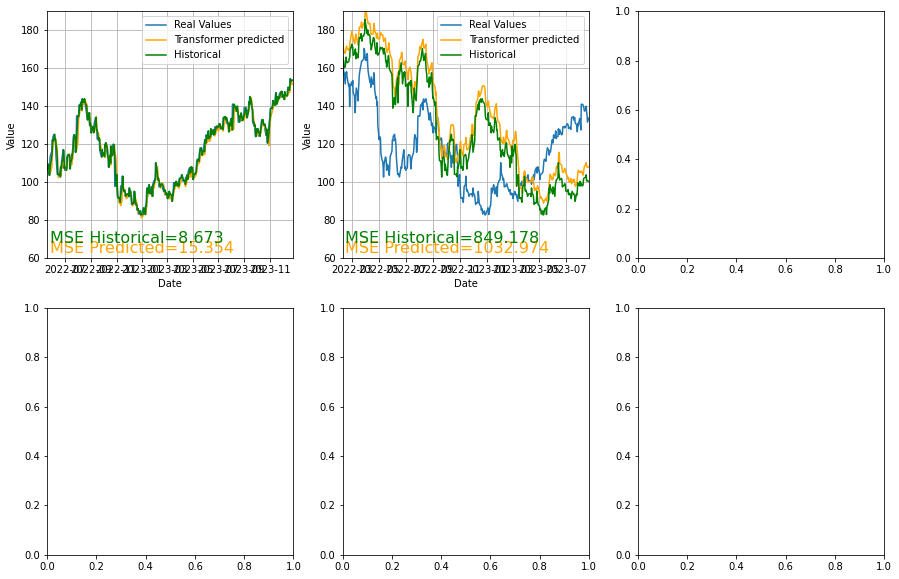

In [25]:
tr_tst = 0.8
processed_path = f"/home/vvallejo/Finance-AI/DataProcessed/{tr_tst}"
win_size = 2
k = 2
multi = True
mdl  = 'transformer'
_, _, lahead, lpar, tot_res = load_output_preprocessed_data(processed_path, win_size, tr_tst, k, mdl, multi)
def plot_res(ax, DY, msep, msey, stck, mdl, itr):
    ax.plot(DY.index, DY.Y_real, label="Real Values")
    p2 = ax.plot(DY.index, DY.Y_predicted, label="Transformer predicted", color='orange')
    p3 = ax.plot(DY.index, DY.Y_yesterday, label="Historical", color='green')
    
    #ax.set_title(f'{stck} - {mdl.upper()}, Predict {ahead} days ahead. Iter: {itr},\n Heads: {num_heads}, Hidden Layers: {num_layers}')
    ax.set_xlabel('Date')
    ax.set_ylabel('Value')
    ax.legend()
    ax.grid(True)
    
    # Agregar texto
    ax.text(.01, .01, 'MSE Predicted=' + str(round(msep,3)), transform=ax.transAxes, ha='left', va='bottom', fontsize=16, color='#FFA500')
    ax.text(.01, .05, 'MSE Historical=' + str(round(msey,3)), transform=ax.transAxes, fontsize=16, ha='left', va='bottom', color='green')
    print(str(round(msep,3)))
# Código para generar subgráficos para cada valor en la lista lahead
fig, axs = plt.subplots(2, 3, figsize=(15, 10))
for k in [10]:
    for i, ahead in enumerate([1, 90]):
        res1 = tot_res['OUT_MODEL']['scenario_3'][k]['AMZN']
        mdl = 'transformer'
        stck = 'AMZN'
        itr = 0
        DYs = res1[ahead]['DY']
        DY = DYs.loc[itr]
        msep = res1[ahead]['MSEP'][itr]
        msey = res1[ahead]['MSEY'][itr]
        row = i // 3
        col = i % 3
        plot_res(axs[row, col], DY, msep, msey, stck, mdl, itr)
        
        # Ajustar los límites del eje X y Y
        axs[row, col].set_xlim(DY.index.min(), DY.index.max())  # Ajustar los límites del eje X
        axs[row, col].set_ylim(60, 190)